In [5]:
import yfinance as yf

# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Display first few rows
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

    table_found = False

    for table in soup.find_all('table'):
        if "Tesla Annual Revenue" in table.get_text():
            data_table_div = soup.find('div', class_='col-xs-12 col-sm-12 col-md-6 col-xl-6')
            if data_table_div:
                table = data_table_div.find('table', class_='historical_data_table')
                if table:
                    headers = [th.text.strip() for th in table.find_all('th')]
                    
                    rows = []
                    for tr in table.find_all('tr'):
                        tds = tr.find_all('td')
                        if tds:
                            rows.append([td.text.strip() for td in tds])
                    
                    if headers and rows:
                        tesla_revenue = pd.DataFrame(rows, columns=headers)
                        
                        if 'Revenue' in tesla_revenue.columns:
                            tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace('$', '').str.replace(',', '')
                            
                            def convert_to_numeric(value):
                                if 'B' in value:
                                    return float(value.replace('B', '')) * 1_000_000_000
                                elif 'M' in value:
                                    return float(value.replace('M', '')) * 1_000_000
                                else:
                                    return float(value)
                                    
                            tesla_revenue['Revenue'] = tesla_revenue['Revenue'].apply(convert_to_numeric)
                            
                            if 'Date' in tesla_revenue.columns:
                                tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
                            
                            print("Tesla Annual Revenue Data:")
                            print(tesla_revenue.head())
                            print("\nTesla Annual Revenue Data Info:")
                            print(tesla_revenue.info())
                            
                            table_found = True
                            break
                        else:
                            print("Error: 'Revenue' column not found in the extracted table data.")
                    else:
                        print("Error: Could not extract headers or rows from the table.")
                else:
                    print("Error: Could not find the historical data table within the expected div.")
            else:
                print("Error: Could not find the main data table div on the page.")
            break
    
    if not table_found:
        print("Error: Could not find the 'Tesla Annual Revenue' table on the page.")

else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")


Error: Could not find the main data table div on the page.
Error: Could not find the 'Tesla Annual Revenue' table on the page.


In [9]:
# Download GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Display first few rows
gme_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [ ]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html = requests.get(url).text
soup = BeautifulSoup(html, "html.parser")

# Locate the correct table
tables = soup.find_all("table")
for table in tables:
    if "GameStop Quarterly Revenue" in str(table):
        gme_revenue_table = table
        break

# Extract the data into a DataFrame
gme_revenue = pd.read_html(str(gme_revenue_table))[0]
gme_revenue = gme_revenue.dropna()
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace("$", "").str.replace(",", "")
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"])

gme_revenue.head()

NameError: name 'tesla_revenue' is not defined

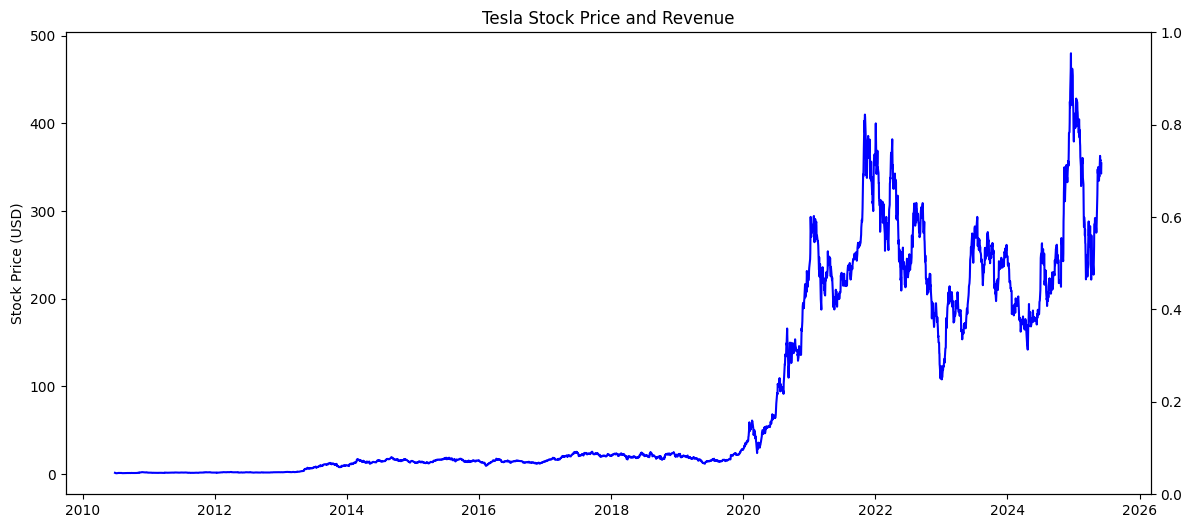

In [11]:
import matplotlib.pyplot as plt

# Plot Tesla Stock and Revenue
fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.plot(tesla_data.index, tesla_data['Close'], label='TSLA Stock Price', color='blue')
ax1.set_ylabel("Stock Price (USD)")
ax1.set_title("Tesla Stock Price and Revenue")

# Create second y-axis for revenue
ax2 = ax1.twinx()
ax2.plot(pd.to_datetime(tesla_revenue["Date"]), tesla_revenue["Revenue"], label='Revenue', color='green')
ax2.set_ylabel("Revenue (USD Millions)")

fig.tight_layout()
plt.show()